In [8]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

In [9]:
#f = r.TFile("./data/results_stdp_allCalos_allXtals.root")
f = r.TFile("./data/byCrystals_Updated_calo_02_xtal_35_histogramOutput.root")
f.ls()

TFile**		./data/byCrystals_Updated_calo_02_xtal_35_histogramOutput.root	
 TFile*		./data/byCrystals_Updated_calo_02_xtal_35_histogramOutput.root	
  KEY: TH1D	htime;1	htime
  KEY: TH1D	htime2;1	htime2
  KEY: TH1D	hdeltat;1	#deltat
  KEY: TH3D	h3d_0;1	E_{late} vs. #deltat vs. E_{early} [0 < t_{late} < 30 #mus]
  KEY: TH3D	h3d_30;1	E_{late} vs. #deltat vs. E_{early} [30 < t_{late} < 100 #mus]
  KEY: TH3D	h3d_100;1	E_{late} vs. #deltat vs. E_{early} [100 < t_{late} < 200 #mus]
  KEY: TH3D	h3d_200;1	E_{late} vs. #deltat vs. E_{early} [200 < t_{late} < 400 #mus]
  KEY: TH3D	h3d_400;1	E_{late} vs. #deltat vs. E_{early} [400 < t_{late} < 700 #mus]


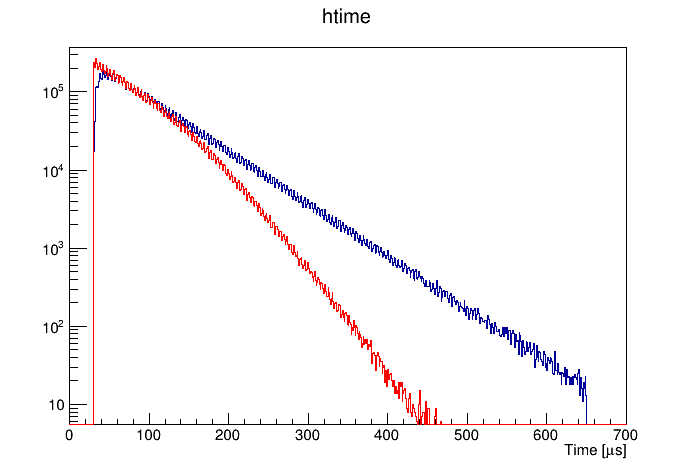

In [10]:
c = r.TCanvas()

htime = f.Get("htime").Clone()

htime2 = f.Get("htime2").Clone()
htime2.SetLineColor(2)

htime.Draw()
htime2.Draw("SAME")

#htime.GetYaxis().SetRangeUser(0.9,100000)
c.SetLogy()
c.Draw()

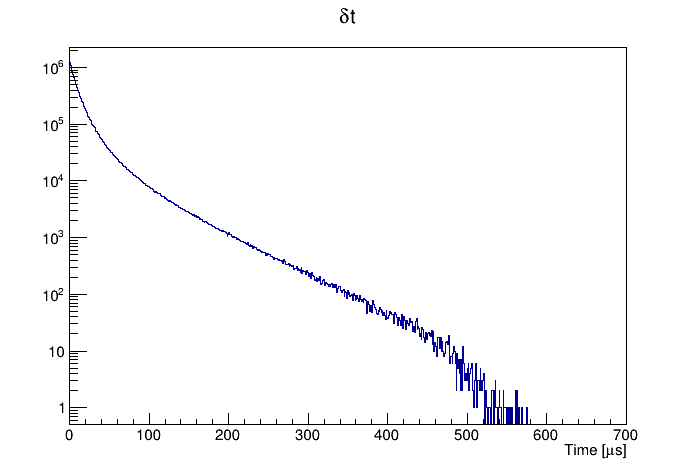

In [11]:
c = r.TCanvas()
hdeltat = f.Get("hdeltat").Clone()
hdeltat.Draw()

#htime.GetYaxis().SetRangeUser(0.9,100000)
c.SetLogy()
c.Draw()

In [12]:
h3d0 = f.Get("h3d_0")
h3d30 = f.Get("h3d_30")
h3d100 = f.Get("h3d_100")
h3d200 = f.Get("h3d_200")
h3d400 = f.Get("h3d_400")

In [29]:
h3d = h3d30.Clone()
h3d.Add(h3d0,1)
h3d.Add(h3d100,1)
h3d.Add(h3d200,1)
h3d.Add(h3d400,1)

#h3d.Rebin3D(2,1,10)
nDivs = h3d.GetZaxis().GetNbins()
print(nDivs, r"$E_{early}$ bins")

310 $E_{early}$ bins


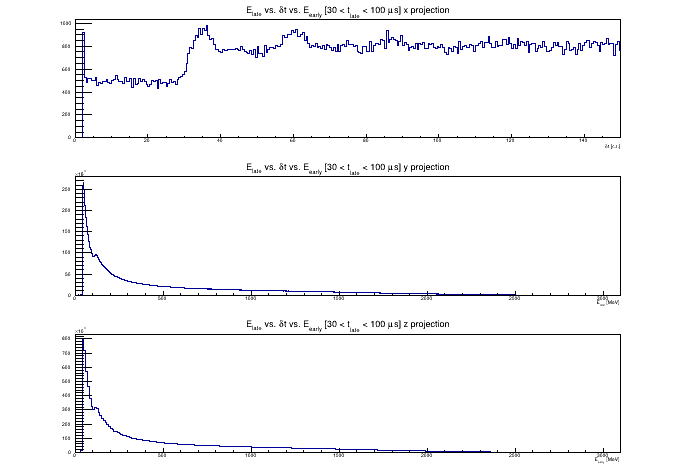

In [30]:
hx = h3d.Project3D("x").Clone()
hy = h3d.Project3D("y").Clone()
hz = h3d.Project3D("z").Clone()
c = r.TCanvas()
c.Divide(1,3)
c.cd(1)
hx.Draw()
c.cd(2)
hy.Draw()
c.cd(3)
hz.Draw()
c.Draw()

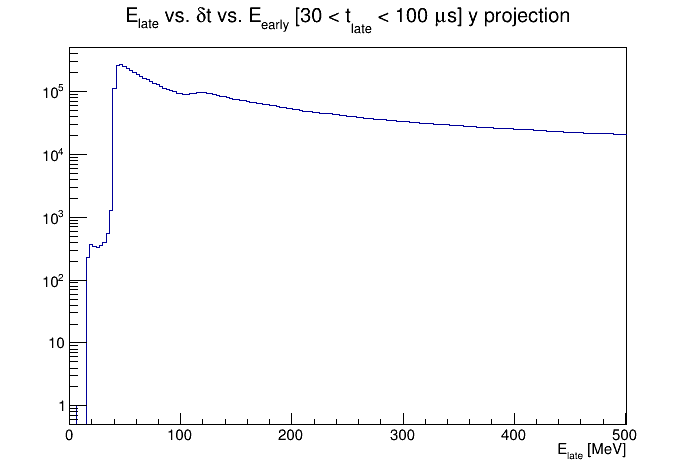

In [33]:
hy = h3d.Project3D("y").Clone()
c = r.TCanvas()
hy.GetXaxis().SetRangeUser(0,500)
hy.Draw()
c.SetLogy()
c.Draw()

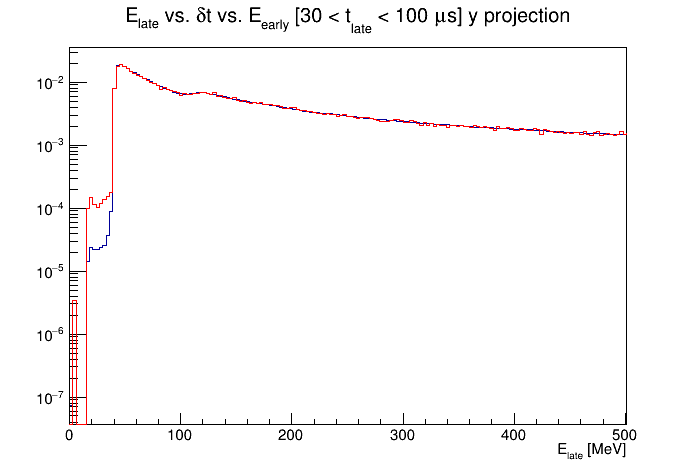

In [38]:
h3d.GetZaxis().SetRangeUser(0,2000)
hy = h3d.Project3D("y").Clone("hy")
hy.Scale(1/hy.GetEntries())
h3d.GetZaxis().SetRangeUser(2000,3000)
hy2 = h3d.Project3D("y").Clone("hy2")
hy2.Scale(1/hy2.GetEntries())
c = r.TCanvas()
hy.GetXaxis().SetRangeUser(0,500)
hy.Draw("hist")

hy2.SetLineColor(2)
hy2.Draw("hist same")

c.SetLogy()
c.Draw()